<a href="https://colab.research.google.com/github/Yasserrp/YRP/blob/main/Tugas2_nn_4_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [17]:
ls

 119B08AC-DE98-4634-A97D-1F009A92F7EE.png
'[1] Barisan dan Deret.pptx'
'5. FUNGI.gslides'
'AKTA FAIQ.jpeg'
'bukti uts rl.jpg'
 Classroom/
'colab 2'/
 D531EA2A-44BE-40E3-9BBF-23C2C13C66C3.png
'Form asterix.pdf'
'IJAZAH SD FAIQ.jpeg'
 IMG20200117140857.jpg
 IMG20200117140859.jpg
 IMG20200117140910.jpg
 IMG20200117141212.jpg
 IMG_2079.MOV
'IMG_2084 (1).MOV'
 IMG_2084.MOV
'jurnal fisdas KAP TT-6a.pdf'
'JURNAL_MODUL 1_YASSER RENA PASHA_1101194199_SHIFT 4.docx'
'JURNAL_MODUL 2_YASSER RENA PASHA_1101194199_SHIFT 4-dikonversi.pdf'
'KAMIS(3)_TT06(A)_YASSER RENA PASHA_1101194199_KAP.pdf'
'KARTU NISN FAIQ.jpeg'
 KK.jpeg
'Notulensi Radiv 1 (25 September 2019).gdoc'
'Plant Tissues - Class 9 Tutorial (1).mp4'
'quiz ol1.png'
'Scbd 2020'/
'screenshot quiziz fisdas KAP.jpeg'
'Seminar TelU_page-0080.jpg'
'Template Jurnal KAP .gdoc'
'Tugas 4 teorema sirkuit_Yasser RP_TT-43-.pdf'
'Tugas COVID-19.gdoc'
 Vid/
'WhatsApp Image 2020-10-26 at 12.21.39.jpeg'
'YASSER RENA PASHA_1101194199_UTSPDA.pdf'


In [18]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [19]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("colab 2")
data = []
labels = []

[INFO] loading images...


In [20]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [21]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [22]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [23]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [26]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [28]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                

In [29]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [31]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [32]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 21ms/step - loss: 1.6217 - accuracy: 0.2192 - val_loss: 1.5573 - val_accuracy: 0.3493
Epoch 2/25
14/14 [==============================] - 0s 6ms/step - loss: 1.5105 - accuracy: 0.3744 - val_loss: 1.4564 - val_accuracy: 0.4178
Epoch 3/25
14/14 [==============================] - 0s 6ms/step - loss: 1.3384 - accuracy: 0.5616 - val_loss: 1.2615 - val_accuracy: 0.5205
Epoch 4/25
14/14 [==============================] - 0s 6ms/step - loss: 1.1237 - accuracy: 0.5799 - val_loss: 1.1583 - val_accuracy: 0.5068
Epoch 5/25
14/14 [==============================] - 0s 6ms/step - loss: 1.0058 - accuracy: 0.6187 - val_loss: 1.0891 - val_accuracy: 0.5548
Epoch 6/25
14/14 [==============================] - 0s 6ms/step - loss: 0.9009 - accuracy: 0.6507 - val_loss: 0.9298 - val_accuracy: 0.6575
Epoch 7/25
14/14 [==============================] - 0s 7ms/step - loss: 0.7811 - accuracy: 0.7192 - val_loss: 0.8642 - val_accuracy: 0.6507
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


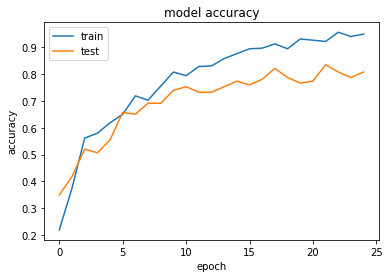

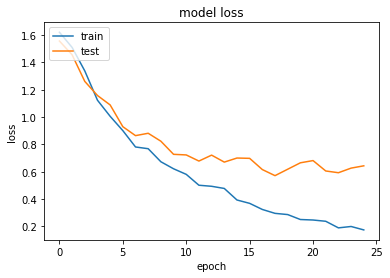

In [33]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.66      0.79      0.72        24
      GMB_02       1.00      0.58      0.73        31
      GMB_03       0.85      0.93      0.89        30
      GMB_04       0.83      0.78      0.81        32
      GMB_05       0.78      0.97      0.86        29

    accuracy                           0.81       146
   macro avg       0.82      0.81      0.80       146
weighted avg       0.83      0.81      0.80       146



In [35]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [36]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_133326_HDR.jpg'

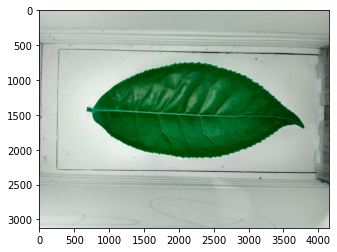

In [37]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [39]:
image_testing = Image.open('IMG_20200814_133326_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [40]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [41]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.4142286  0.24834175 0.3374296 ]]
['GMB_01']
